# Non-Trainable Layers

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
391/391 [==============================] - 21s 29ms/step - loss: 1.4452 - accuracy: 0.4944 - val_loss: 1.3071 - val_accuracy: 0.5450
Epoch 2/10
391/391 [==============================] - 10s 27ms/step - loss: 1.2512 - accuracy: 0.5617 - val_loss: 1.2769 - val_accuracy: 0.5463
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.1916 - accuracy: 0.5811 - val_loss: 1.2128 - val_accuracy: 0.5718
Epoch 4/10
391/391 [==============================] - 10s 27ms/step - loss: 1.1466 - accuracy: 0.5982 - val_loss: 1.1901 - val_accuracy: 0.5855
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 1.1162 - accuracy: 0.6085 - val_loss: 1.1756 - val_accuracy: 0.5898
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 1.0860 - accuracy: 0.6199 - val_loss: 1.1601 - val_accuracy: 0.5926
Epoch 7/10
391/391 [==============================] - 11s 27ms/step - lo

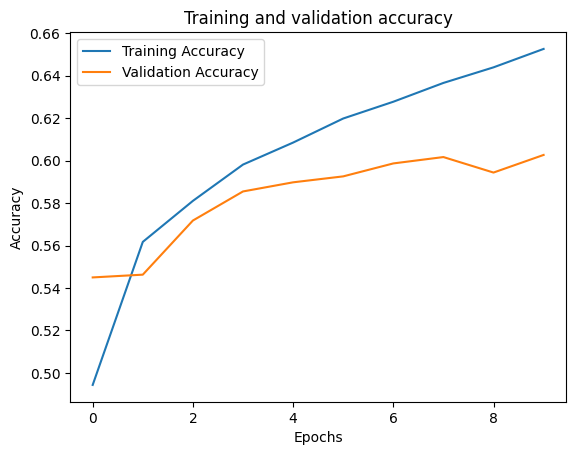

313/313 [==============================] - 3s 9ms/step


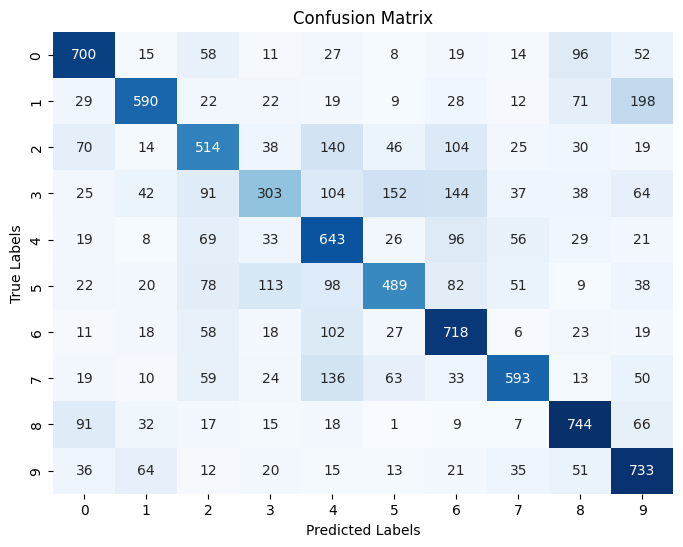

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(model.output)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)  # Add Flatten layer
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128,
                    epochs=10, validation_data=(x_test, y_test))234

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

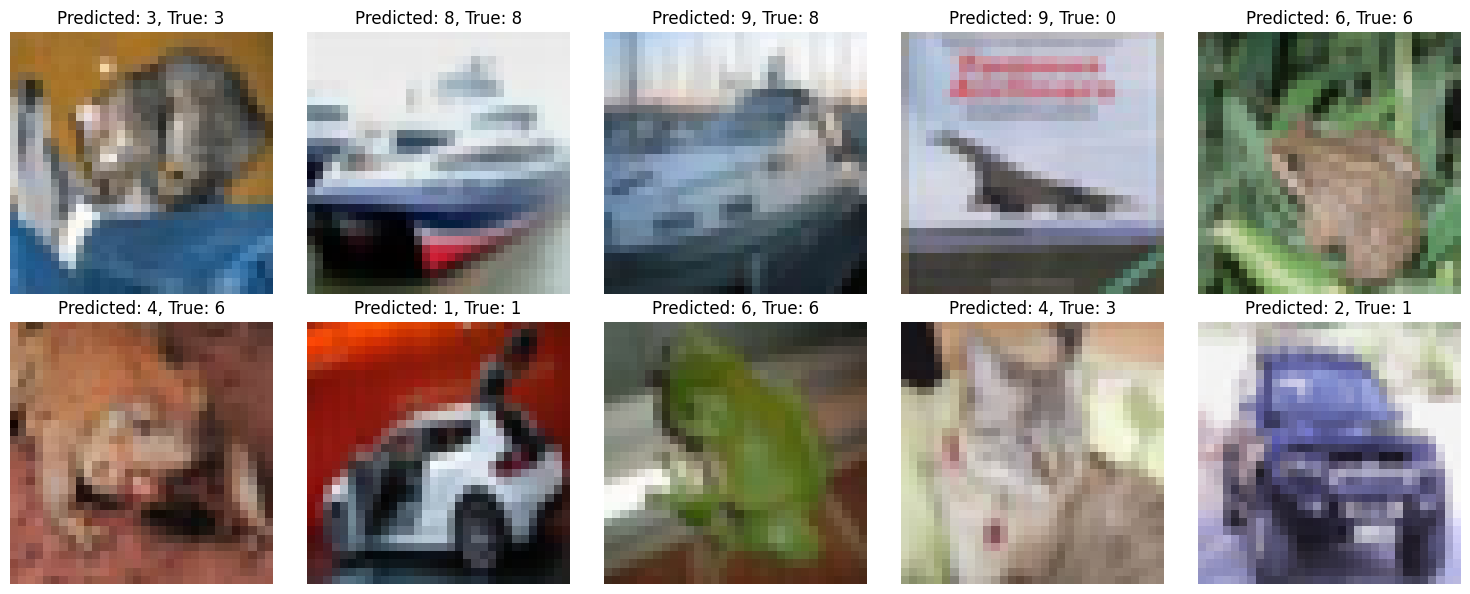

In [ ]:
num_images_to_print = 10
num_rows=2
num_cols=num_images_to_print//num_rows
plt.figure(figsize=(15,6))

for i in range(num_images_to_print):
    plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(x_test[i].squeeze(),cmap='gray')  # Display the image
    plt.title(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Trainable Layers

Epoch 1/10
391/391 [==============================] - 37s 74ms/step - loss: 1.9451 - accuracy: 0.2279 - val_loss: 1.6869 - val_accuracy: 0.3161
Epoch 2/10
391/391 [==============================] - 28s 70ms/step - loss: 1.4851 - accuracy: 0.4054 - val_loss: 1.2874 - val_accuracy: 0.5074
Epoch 3/10
391/391 [==============================] - 26s 67ms/step - loss: 1.1496 - accuracy: 0.5770 - val_loss: 1.0820 - val_accuracy: 0.6181
Epoch 4/10
391/391 [==============================] - 27s 70ms/step - loss: 0.9559 - accuracy: 0.6600 - val_loss: 0.9779 - val_accuracy: 0.6595
Epoch 5/10
391/391 [==============================] - 26s 68ms/step - loss: 0.8735 - accuracy: 0.7042 - val_loss: 1.0200 - val_accuracy: 0.6687
Epoch 6/10
391/391 [==============================] - 27s 70ms/step - loss: 0.7753 - accuracy: 0.7446 - val_loss: 0.8709 - val_accuracy: 0.7199
Epoch 7/10
391/391 [==============================] - 26s 67ms/step - loss: 0.7369 - accuracy: 0.7632 - val_loss: 0.8317 - val_accuracy:

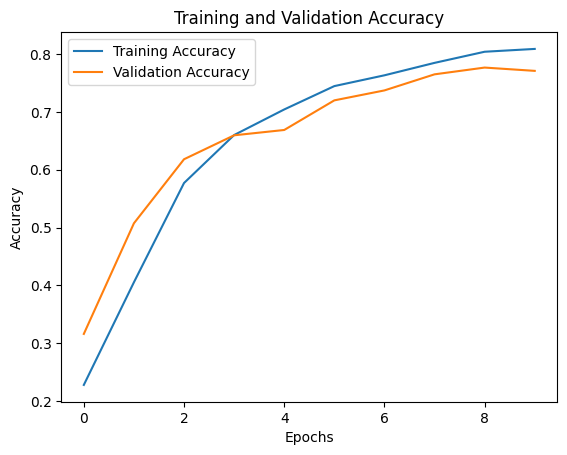

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128,
                    epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 3s 9ms/step


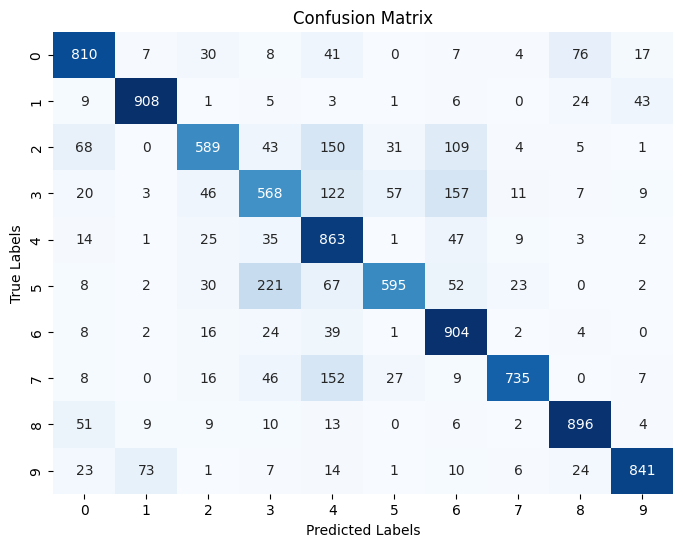

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

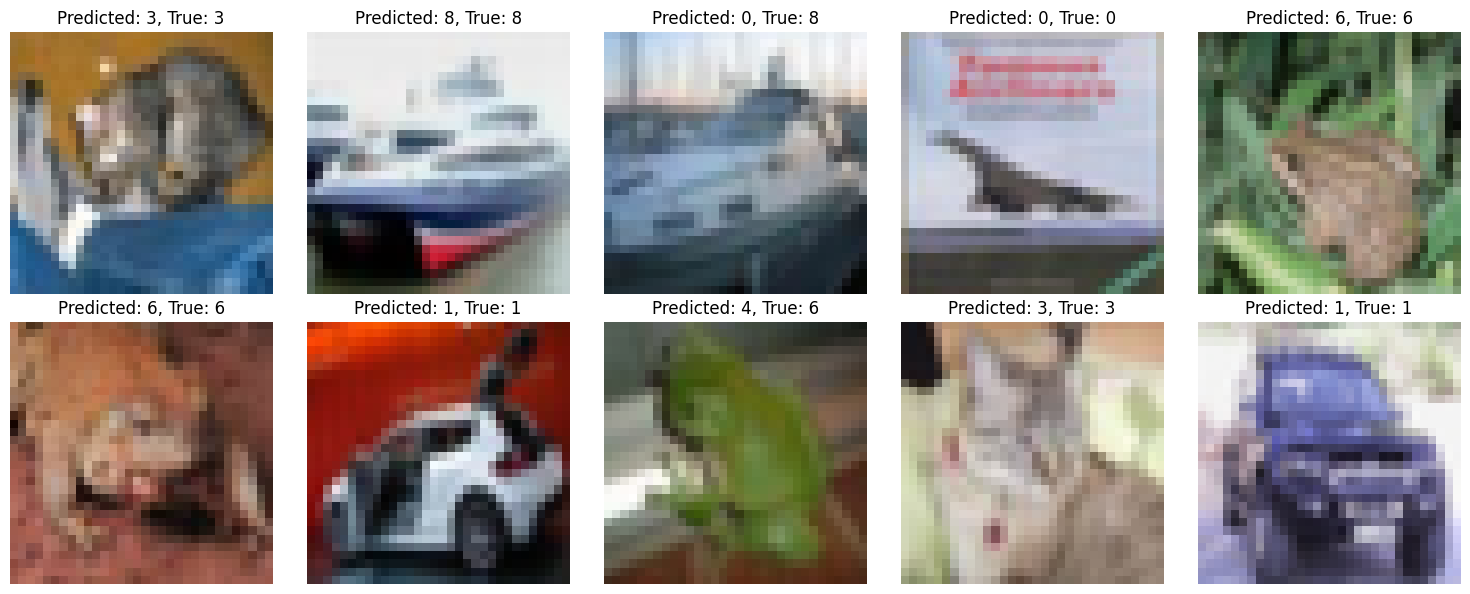

In [ ]:
num_images_to_print = 10
num_rows=2
num_cols=num_images_to_print//num_rows
plt.figure(figsize=(15,6))

for i in range(num_images_to_print):
    plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(x_test[i].squeeze(),cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()